In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
rad2deg=180./np.pi

In [3]:
d=pd.read_csv("alerts.txt",sep='|')
len(d)

603

(array([ 93.,  64.,  42.,  33.,  23.,  13.,  14.,  20.,  13.,  10.,  12.,
         11.,  20.,  12.,  14.,  16.,  17.,  14.,  11.,  14.,  14.,  15.,
          7.,  11.,  16.,   9.,  12.,   7.,   3.,   5.,   6.,   4.,   0.,
          4.,   3.,   4.,   2.,   2.,   4.,   1.,   1.,   1.,   2.,   2.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([  5.00076815,   5.1475744 ,   5.29438065,   5.4411869 ,
          5.58799315,   5.73479939,   5.88160564,   6.02841189,
          6.17521814,   6.32202439,   6.46883064,   6.61563688,
          6.76244313,   6.90924938,   7.05605563,   7.20286188,
          7.34966812,   7.49647437,   7.64328062,   7.79008687,
          7.93689312,   8.08369936,   8.23050561,   8.37731186,
          8.52411811,   8.67092436,   8.81773061,   8.96453685,
          9.1113431 ,   9.25814935,   9.4049556 ,   9.55176185,
          9.69856809,   9.84537434,   9.99218059,  10.13898684,
         10.28579309,  10.43259934,  10.57940558,  10.72621183,
         10.873018

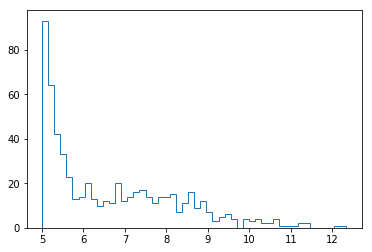

In [4]:
hist(d['signif'],bins=50,histtype='step')

(array([  35.,    2.,   98.,  112.,    3.,    0.,    0.,  169.,   55.,
          20.,   10.,   23.,   20.,    5.,   20.,    3.,    6.,    1.,
           5.,    1.,    6.,    3.,    1.,    0.,    0.,    1.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([ 0.05725982,  0.06529054,  0.07332126,  0.08135199,  0.08938271,
         0.09741344,  0.10544416,  0.11347489,  0.12150561,  0.12953634,
         0.13756706,  0.14559779,  0.15362851,  0.16165924,  0.16968996,
         0.17772069,  0.18575141,  0.19378214,  0.20181286,  0.20984358,
         0.21787431,  0.22590503,  0.23393576,  0.24196648,  0.24999721,
         0.25802793,  0.26605866,  0.27408938,  0.28212011,  0.29015083,
         0.29818156,  0.30621228,  0.31424301,  0.32227373,  0.33030446,
         0.33833518,  0.3463659 ,  0.35439663,  0.36242735,  0.37045808,
         0.37848

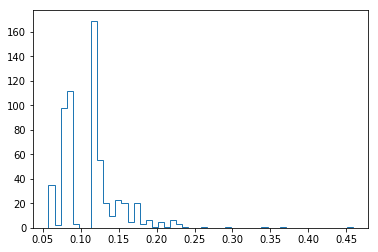

In [5]:
hist(d['porErr']*rad2deg,bins=50,histtype='step')

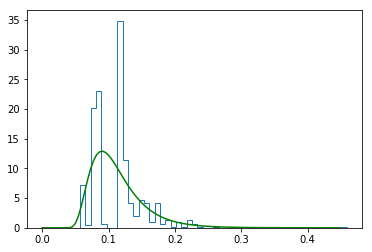

In [6]:
from scipy.stats import lognorm
param = lognorm.fit(d['porErr']*rad2deg,loc=0)
x=np.linspace(0,0.45,100)

pdf_fitted = lognorm.pdf(x, param[0], loc=param[1], scale=param[2])
plt.plot(x,pdf_fitted,'g-')
h=hist(d['porErr']*rad2deg,bins=50,histtype='step',normed=True)

In [7]:
mu = np.log(param[2])
sigma = param[0]
E = np.exp(mu + 0.5*sigma**2)
print param[0],param[1],param[2]

0.463632912751 0.0302994104141 0.0741518054165


In [8]:
lognorm.rvs(param[0], loc=param[1], scale=param[2], size=1, random_state=None)[0]

0.10423202529179125

In [9]:
import kent_distribution as kd

In [10]:
def car2sph(vec):
    x=vec[0]
    y=vec[1]
    z=vec[2]
    r=np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y,x)
    th = np.arctan2(np.sqrt(x**2+y**2),z)
    return r,th,phi

In [126]:
import healpy as hp
Nside = 64
m=np.zeros(hp.nside2npix(Nside))
events=1000000

k=kd.kent(84*pi/180, 22*pi/180, 0.,  10.0, 0.0)
#kent recieves first RA and then Dec, it gives back values in x,y,z
#kappa gives the concentration, kappa=1000 gets into trouble
pos = k.rvs(events)
for i in xrange(events):
    r,th,phi = car2sph(pos[i])
    
    #phi%=2*np.pi
    #print th, dec
    pix = hp.ang2pix(Nside,th,phi)
    m[pix]+=1
    

0.0 180.0 -180.0 180.0
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


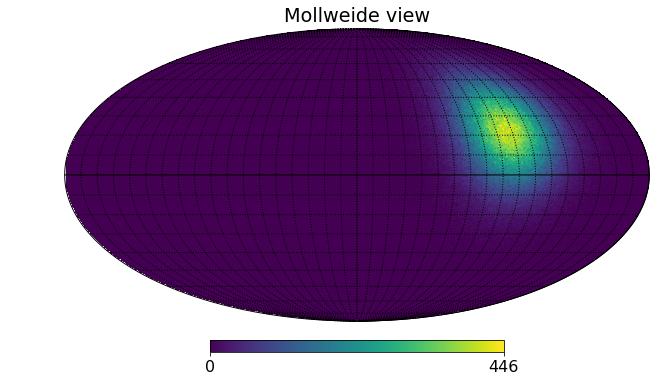

In [127]:
hp.mollview(m,rot=180)
#hp.projscatter((90-22.0)*np.pi/180,84*np.pi/180,color='r')
hp.graticule(dpar=10)

In [32]:
import scipy.stats as st
st.norm.ppf(.99865)
st.powerlaw.rvs()


2.9999769927034015

In [194]:
llh = []
p = []
for i in xrange(100000):
    pIC = np.power(10,st.uniform.rvs(-4,4))
    p.append(pIC)
    #llh.append(np.log10(pIC))
    llh.append(np.log(p[i]/(1-p[i])))

    

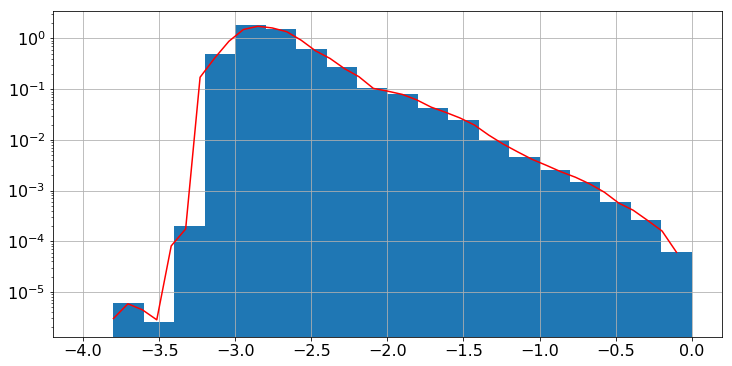

In [312]:
from scipy.interpolate import interp1d
normed_hist = \
[  0.00000000e+00,  5.99855625e-06,  2.56068410e-06,  2.00041249e-04,
   4.96561472e-01,  1.80710446e+00,  1.53757070e+00,  6.19210631e-01,
   2.69402835e-01,  1.04740183e-01,  7.86432556e-02,  4.19244509e-02,
   2.51411438e-02,  9.83825515e-03,  4.66870813e-03,  2.57092417e-03,
   1.48438797e-03,  6.00967147e-04,  2.68416599e-04,  6.06027188e-05]


bins_log10_signalness = \
[-4., -3.8, -3.6, -3.4, -3.2, -3.,  -2.8, -2.6, -2.4, -2.2, -2.,  -1.8, -1.6, -1.4, -1.2,
 -1., -0.8, -0.6, -0.4, -0.2,  0. ]
bins = np.asarray(bins_log10_signalness)
bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])

f2 = interp1d(bin_centers, normed_hist)
xnew=np.linspace(-3.8,-0.1,40)


bar(bin_centers,normed_hist,width=0.2)
plot(xnew,f2(xnew),'r')
#h=hist(p,bins=100,histtype='step',normed=True)

yscale('log')
grid()
#xscale('log')

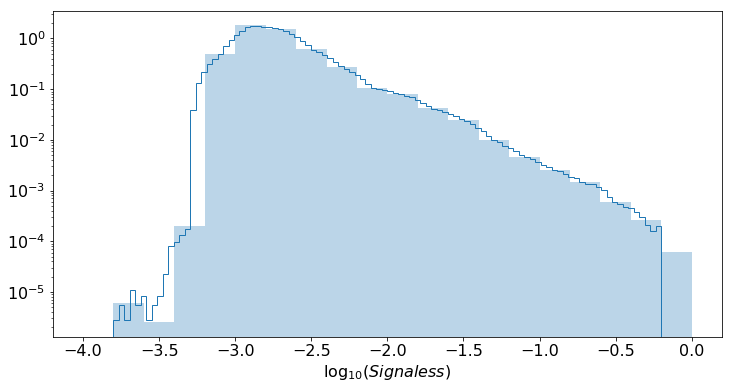

In [350]:
def signaless(n):
    normed_hist = \
    [  0.00000000e+00,  5.99855625e-06,  2.56068410e-06,  2.00041249e-04,
       4.96561472e-01,  1.80710446e+00,  1.53757070e+00,  6.19210631e-01,
       2.69402835e-01,  1.04740183e-01,  7.86432556e-02,  4.19244509e-02,
       2.51411438e-02,  9.83825515e-03,  4.66870813e-03,  2.57092417e-03,
       1.48438797e-03,  6.00967147e-04,  2.68416599e-04,  6.06027188e-05]
    bins_log10_signalness = \
    [-4., -3.8, -3.6, -3.4, -3.2, -3.,  -2.8, -2.6, -2.4, -2.2, -2.,  -1.8, -1.6, -1.4, -1.2,
     -1., -0.8, -0.6, -0.4, -0.2,  0. ]
    
    bins = np.asarray(bins_log10_signalness)
    bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])
    
    f2 = interp1d(bin_centers, normed_hist)
    xnew=np.linspace(-3.8,-0.2,200)
    
    cdf = np.cumsum(f2(xnew))
    cdf = cdf / cdf[-1]
    values = np.random.rand(n)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = xnew[value_bins]
    return random_from_cdf

bar(bin_centers,normed_hist,width=0.2,alpha=0.3)
h=plt.hist(signaless(10000000), 100,normed=True,histtype='step')

yscale('log')
xlabel(r'$\log_{10} (Signaless)$')
savefig("/Users/hugo/AMON/Technical_Notes/IC-HAWC_Analysis/signalessPDF.pdf")

In [342]:
def smallLikelihood(dst,sigc):
    llh =   -dst**2/(2*sigc**2)
    return llh

x=linspace(0, 3.5, 100)
y=linspace(0.13,15.6,100)

X,Y = meshgrid(x,y)
Z = smallLikelihood(X,Y)

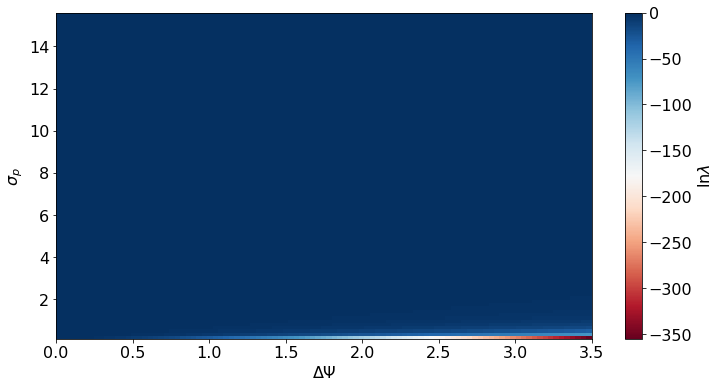

In [96]:
rcParams['figure.figsize']=12,6
rcParams['font.size']=16
pcolor(X, Y, Z, cmap=cm.RdBu,)
colorbar(label=r'$\ln \lambda$')
xlabel(r'$\Delta \Psi$')
ylabel(r'$\sigma_p$')

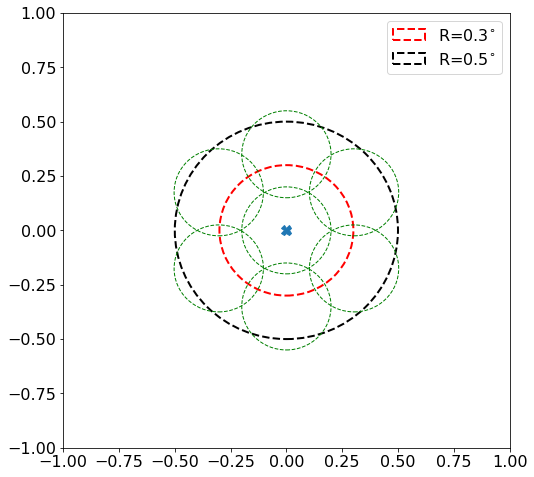

In [464]:
rcParams['figure.figsize']=8,8
circle1 = plt.Circle((0, 0), 0.3, color='r',fill=False,lw=2,ls='--',)
circle2 = plt.Circle((0, 0), 0.5, color='k',fill=False,lw=2,ls='--',)



circle3 = plt.Circle((0, 0), 0.2, color='g',fill=False,lw=1,ls='--')

#r=0.35, theta =30
circle4 = plt.Circle((0, 0.35), 0.2, color='g',fill=False,lw=1,ls='--')
circle5 = plt.Circle((0.3031, 0.175), 0.2, color='g',fill=False,lw=1,ls='--')
circle6 = plt.Circle((-0.3031, 0.175), 0.2, color='g',fill=False,lw=1,ls='--')
circle7 = plt.Circle((0.3031, -0.175), 0.2, color='g',fill=False,lw=1,ls='--')
circle8 = plt.Circle((-0.3031, -0.175), 0.2, color='g',fill=False,lw=1,ls='--')
circle9 = plt.Circle((0, -0.35), 0.2, color='g',fill=False,lw=1,ls='--')

#r-0.7, theta
circle10 = plt.Circle((0, 0.7), 0.2, color='g',fill=False,lw=1,ls='--')
circle11 = plt.Circle((0.6062, 0.35), 0.2, color='g',fill=False,lw=1,ls='--')
circle12 = plt.Circle((-0.6062, 0.35), 0.2, color='g',fill=False,lw=1,ls='--')
circle13 = plt.Circle((0.6062, -0.35), 0.2, color='g',fill=False,lw=1,ls='--')
circle14 = plt.Circle((-0.6062, -0.35), 0.2, color='g',fill=False,lw=1,ls='--')
circle15 = plt.Circle((0, -0.7), 0.2, color='g',fill=False,lw=1,ls='--')
circle16 = plt.Circle((0.6062,0), 0.2, color='g',fill=False,lw=1,ls='--')
circle17 = plt.Circle((-0.6062,0), 0.2, color='g',fill=False,lw=1,ls='--')
circle18 = plt.Circle((0.3031,0.5249), 0.2, color='g',fill=False,lw=1,ls='--')
circle19 = plt.Circle((-0.3031,0.5249), 0.2, color='g',fill=False,lw=1,ls='--')
circle20 = plt.Circle((0.3031,-0.5249), 0.2, color='g',fill=False,lw=1,ls='--')
circle21 = plt.Circle((-0.3031,-0.5249), 0.2, color='g',fill=False,lw=1,ls='--')





fig, ax = plt.subplots()

ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.add_artist(circle5)
ax.add_artist(circle6)
ax.add_artist(circle7)
ax.add_artist(circle8)
ax.add_artist(circle9)
# ax.add_artist(circle10)
# ax.add_artist(circle11)
# ax.add_artist(circle12)
# ax.add_artist(circle13)
# ax.add_artist(circle14)
# ax.add_artist(circle15)
# ax.add_artist(circle16)
# ax.add_artist(circle17)
# ax.add_artist(circle18)
# ax.add_artist(circle19)
# ax.add_artist(circle20)
# ax.add_artist(circle21)

legend([circle1,circle2], [r'R=0.3$^{\circ}$',r'R=0.5$^{\circ}$'])

plot(0,0,"X",ms=10)
xlim(-1.0,1.0)
ylim(-1.0,1.0)
savefig("/Users/hugo/AMON/Proposals/Swift_GI_2017/pointing.png")

(-3, 3)

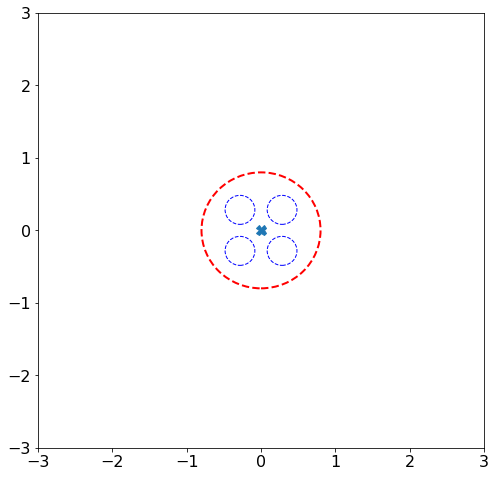

In [387]:
rcParams['figure.figsize']=8,8
circle1 = plt.Circle((0, 0), 0.8, color='r',fill=False,lw=2,ls='--')

R=0.4
x=R*np.cos(np.pi/4)
circle2 = plt.Circle((x, x), 0.2, color='b',fill=False,lw=1,ls='--')
circle3 = plt.Circle((-x, x), 0.2, color='b',fill=False,lw=1,ls='--')
circle4 = plt.Circle((-x, -x), 0.2, color='b',fill=False,lw=1,ls='--')
circle5 = plt.Circle((x, -x), 0.2, color='b',fill=False,lw=1,ls='--')
fig, ax = plt.subplots()
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.add_artist(circle5)

plot(0,0,"X",ms=10)
xlim(-3,3)
ylim(-3,3)